In [14]:
import random as rnd
from scipy.stats import bernoulli

In [15]:
# In Python we can use random, which produces a random variable on the interval 
#   [0,1), which means that all values are greater than or equal to 0 and less 
#   than 1. This function is park of the "random" package imported above as "rnd".
p = 0.7 # choose value for p
single_outcome_method_1 = rnd.random() < p # create logical variable from single pick
print(f"outcome using rand = {single_outcome_method_1}") # print the result

# Or, equivalently, use bernoulli, which is a function in scipy.stats that 
#   generates a random pick from a Bernoulli distribution.
# Choose value for p
p = 0.7  
# Generate a single sample using the rvs ("random variates") method. 
#   To generate >1 sample, use the size argument
single_outcome_method_2 = bernoulli.rvs(p, size=1) 
# Print the output
print(f'outcome using binornd = {bool(single_outcome_method_2)}')

# Now generate lots of Bernoulli trials to check if it is converging on the 
#   appropriate probability
# Choose value for p
p = 0.7  
# Number of Bernoulli trials to simulate
N = 10000
# Use the size argument to generate outcomes (an ndarray) from lot of trials
outcomes = bernoulli.rvs(p, size=N) 
type(outcomes)
print(f'{(outcomes == False).sum()} zeros, {(outcomes == True).sum()} ones, simulated p = {(outcomes == True).sum()/outcomes.size}, empirical p = {p}')

outcome using rand = True
outcome using binornd = True
3026 zeros, 6974 ones, simulated p = 0.6974, empirical p = 0.7


In [23]:
import seaborn as sns
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

ModuleNotFoundError: No module named 'seaborn'

In [24]:
!/Library/Frameworks/Python.framework/Versions/3.13/bin/python3.13 -m pip install seaborn


In [25]:
import seaborn as sns
print("Seaborn version:", sns.__version__)

Seaborn version: 0.13.2


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/_methods.py:211: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


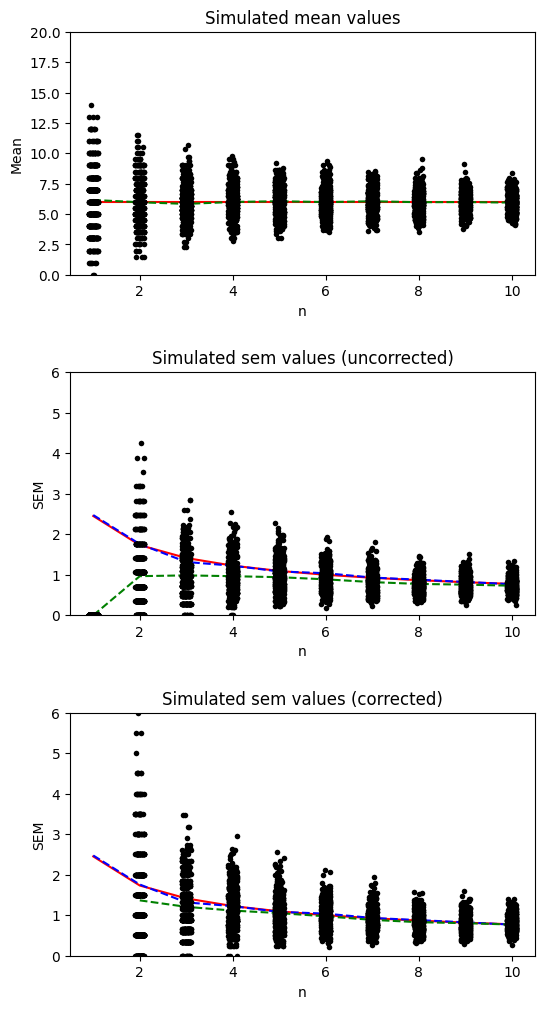

In [26]:
# Use Poisson distribution to simulate measurements of spike rates
poisson_rate = 6

# Simulate num experiments, using sample sizes n=1:num
num_experiments_per_n = 500
max_n_per_experiment = 10
means = np.zeros((max_n_per_experiment, num_experiments_per_n))
stds = np.zeros((max_n_per_experiment, num_experiments_per_n, 2))
# bessel_corrected_stds = np.zeros((max_n_per_experiment, num_experiments_per_n, 2))
ns = np.arange(1,max_n_per_experiment+1)

# Simulate different sample sizes
for n in ns:

    # Simulate multiple experiments
    samples = np.random.poisson(poisson_rate, (num_experiments_per_n, n))

    # Compute the sample mean and std from each experiment
    means[n-1,:] = samples.mean(axis=1)
    stds[n-1,:,0] = samples.std(axis=1,ddof=0)
    stds[n-1,:,1] = samples.std(axis=1,ddof=1)
    

# Set up figure
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
fig.subplots_adjust(hspace=0.4)

# Top plot is means. Note that the simulated sample means (black dots) provide, on average,
# an unbiased estimate (the mean of the simulated sample means, plotted as a dashed green line)
# of the population mean (red line)
plt.axes(axs[0]).axis([0, max_n_per_experiment, 0, 20])
plt.xlabel('n')
plt.ylabel('Mean')
sns.stripplot(data=means.transpose(),jitter=True,size=4,color='black')
plt.plot([ns[0]-1, ns[-1]-1], [poisson_rate, poisson_rate], 'r-')
plt.plot(ns-1, means.mean(axis=1), 'g--')
plt.title('Simulated mean values')
plt.xticks([1, 3, 5, 7, 9], ['2', '4', '6', '8', '10'])

# Next plots are sems computed without/with Bessel correction.
# Note that the simulated sample sems (black dots) provide, on average,
# a biased estimate (the mean of the simulated sample standard errors, 
# plotted as a dashed green line) of the population standard error (red line),
# which is matched by the standard deviation of the simulated means (blue line).
# This bias is highest for small n and is substantially reduced using 
# Bessel's correction
#
# Note that computing the corrected sem returns an error for n=1, for which
# the corrected sample sem is not defined (because (n-1) is in the denominator)
title_string = ['uncorrected', 'corrected']
for i in np.arange(2):
    plt.axes(axs[i+1]).axis([0, max_n_per_experiment, 0, 6])
    plt.xlabel('n')
    plt.ylabel('SEM')
    sqrt_ns = np.sqrt(ns)
    sems = stds[:,:,i].transpose()/sqrt_ns[None,:]
    sns.stripplot(data=sems,jitter=True,size=4,color='black')
    plt.plot(ns-1, np.sqrt(poisson_rate/ns), 'r-')
    plt.plot(ns-1, means.std(axis=1), 'b--')
    plt.plot(ns-1,sems.mean(axis=0),'g--')
    plt.title(f'Simulated sem values ({title_string[i]})')
    plt.xticks([1, 3, 5, 7, 9], ['2', '4', '6', '8', '10'])

In [16]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

ModuleNotFoundError: No module named 'statsmodels'

In [17]:
!/Library/Frameworks/Python.framework/Versions/3.13/bin/python3.13 -m pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 42.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 52.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [statsmodels] [statsmodels]


In [18]:
from statsmodels.stats import proportion
print("Statsmodels is working ✅")

Statsmodels is working ✅


In [19]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials 
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')
     

670 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.6700


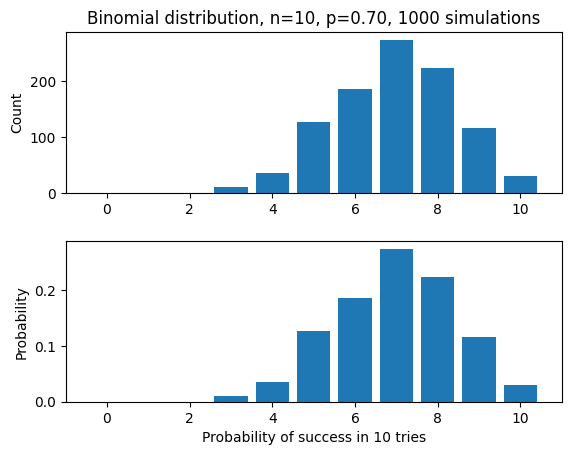

In [20]:
# The full probability distribution describes the probabilty of obtaining each 
#   possible number of successes (k), given n and p. If we set n=10, the the 
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate 
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram) 
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

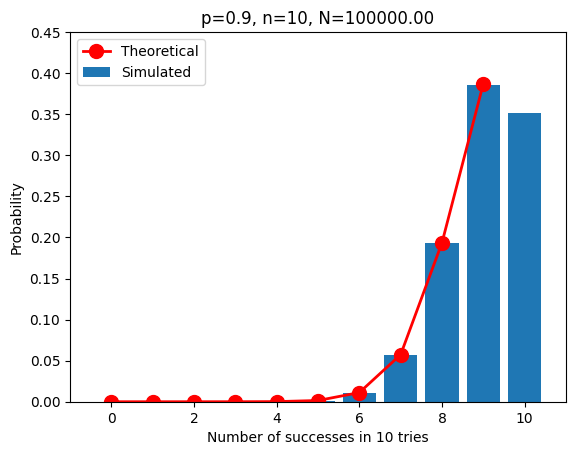

In [21]:
# Now let's make a fun animation showing different values of p and N. 
#   Note that, of course, the more picks you make of the random variable 
#   (higher N), the more closely the outcomes (the "samples") match the true 
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)
        
        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)



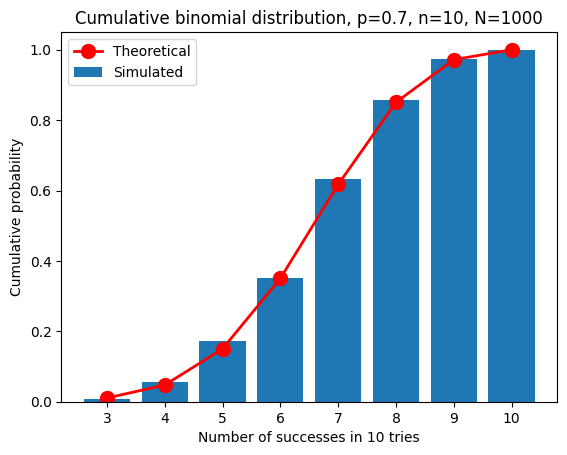

In [22]:

# The cumulative distribution function is just the proability of obtaining an 
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so 
#   it is a probability function and not just a histogram -- note that the final 
#   value in the cdf should equal 1 because every value should be equal to or 
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find 
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

P(X = 0) = 0.1074
P(X = 1) = 0.2684
P(X = 2) = 0.3020
P(X = 3) = 0.2013
P(X = 4) = 0.0881
P(X = 5) = 0.0264
P(X = 6) = 0.0055
P(X = 7) = 0.0008
P(X = 8) = 0.0001
P(X = 9) = 0.0000
P(X = 10) = 0.0000


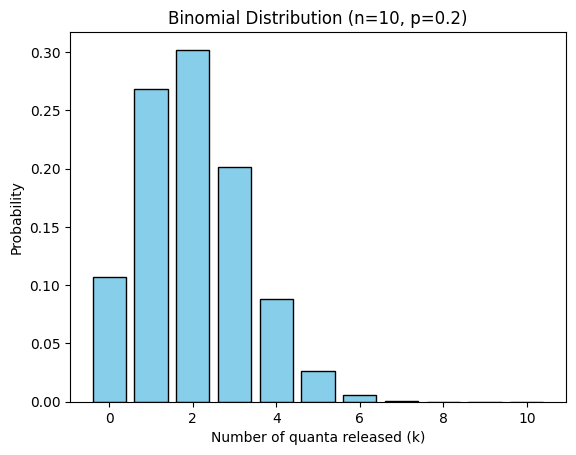

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10   # number of quanta (trials)
p = 0.2  # probability of release (success per trial)

# Values of k (number of quanta released)
k_values = np.arange(0, n+1)

# Compute binomial probabilities
probs = binom.pmf(k_values, n, p)

# Print probabilities
for k, prob in zip(k_values, probs):
    print(f"P(X = {k}) = {prob:.4f}")

# Plot the probability distribution
plt.bar(k_values, probs, color="skyblue", edgecolor="black")
plt.xlabel("Number of quanta released (k)")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()


P(X=8 | n=14, p=0.1) = 0.0000159592
P(X=8 | n=14, p=0.7) = 0.1262022741

Likelihood at each decile p:
  p=0.1 -> L=0.0000159592
  p=0.2 -> L=0.0020152792
  p=0.3 -> L=0.0231800095
  p=0.4 -> L=0.0918211579
  p=0.5 -> L=0.1832885742
  p=0.6 -> L=0.2065976053
  p=0.7 -> L=0.1262022741
  p=0.8 -> L=0.0322444670
  p=0.9 -> L=0.0012926930
  p=1.0 -> L=0.0000000000

Most likely decile: p=0.6 (L=0.2065976053)

MLE: p_hat = 0.571429 with L(p_hat) = 0.2115388948


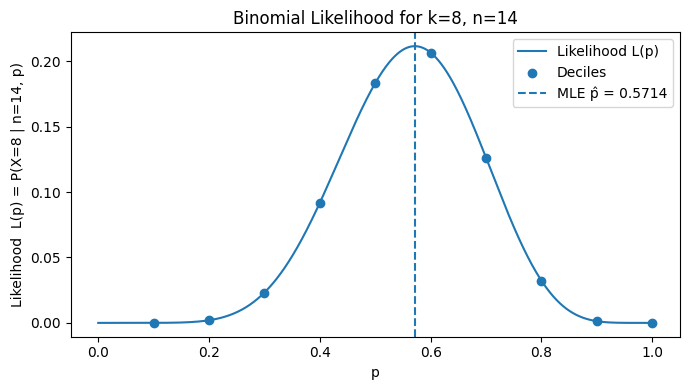

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Observed data
n = 14
k = 8

# Binomial PMF (no SciPy needed)
def binom_pmf(n, k, p):
    return math.comb(n, k) * (p**k) * ((1-p)**(n-k))

# 1) Specific hypotheses: p = 0.1 and p = 0.7
p1 = 0.1
p2 = 0.7
prob_p1 = binom_pmf(n, k, p1)
prob_p2 = binom_pmf(n, k, p2)

print(f"P(X=8 | n=14, p=0.1) = {prob_p1:.10f}")
print(f"P(X=8 | n=14, p=0.7) = {prob_p2:.10f}")

# 2) Likelihood at each decile
deciles = np.round(np.arange(0.1, 1.0 + 0.1, 0.1), 1)
lik_deciles = [(float(p), binom_pmf(n, k, float(p))) for p in deciles]

print("\nLikelihood at each decile p:")
for p, L in lik_deciles:
    print(f"  p={p:.1f} -> L={L:.10f}")

# Which decile maximizes the likelihood?
best_decile, best_L = max(lik_deciles, key=lambda t: t[1])
print(f"\nMost likely decile: p={best_decile:.1f} (L={best_L:.10f})")

# 3) Maximum-likelihood estimate (continuous p)
p_hat = k / n
L_hat = binom_pmf(n, k, p_hat)
print(f"\nMLE: p_hat = {p_hat:.6f} with L(p_hat) = {L_hat:.10f}")

# 4) Plot the likelihood curve and mark deciles + MLE
ps = np.linspace(0.0001, 0.9999, 1000)  # avoid 0 and 1 to keep numbers finite
Ls = [binom_pmf(n, k, p) for p in ps]

plt.figure(figsize=(7,4))
plt.plot(ps, Ls, label="Likelihood L(p)")
plt.scatter(deciles, [binom_pmf(n, k, p) for p in deciles], label="Deciles", zorder=3)
plt.axvline(p_hat, linestyle="--", label=f"MLE p̂ = {p_hat:.4f}")
plt.xlabel("p")
plt.ylabel("Likelihood  L(p) = P(X=8 | n=14, p)")
plt.title("Binomial Likelihood for k=8, n=14")
plt.legend()
plt.tight_layout()
plt.show()


=== Specific p = 0.1 ===
L(p=0.1) = 1.237818721500e-07
log L(p=0.1) = -15.904744915931

=== Likelihood at deciles ===
p= 0.0  ->  L=0.000000000000e+00   logL=-inf
p= 0.1  ->  L=1.237818721500e-07   logL=-15.904744915931492
p= 0.2  ->  L=1.732842750806e-04   logL=-8.660577103497953
p= 0.3  ->  L=4.550575422829e-03   logL=-5.392501587459659
p= 0.4  ->  L=1.897003133922e-02   logL=-3.96489484299538
p= 0.5  ->  L=2.239646762609e-02   logL=-3.7988520278199727
p= 0.6  ->  L=8.431125039654e-03   logL=-4.775825059211709
p= 0.7  ->  L=8.358199756217e-04   logL=-7.087097308234063
p= 0.8  ->  L=1.083026719254e-05   logL=-11.433165825737738
p= 0.9  ->  L=1.528171261111e-09   logL=-20.299194070603935
p= 1.0  ->  L=0.000000000000e+00   logL=-inf

Best decile: p=0.5 with L=2.239646762609e-02

Analytical MLE: p_hat = (k1+k2)/(2n) = 0.46428571
Refined-grid MLE (10001 pts): p ≈ 0.46430714 with L=2.405619759542e-02
L(p_hat) = 2.405619821701e-02    (should match the refined-grid result closely)


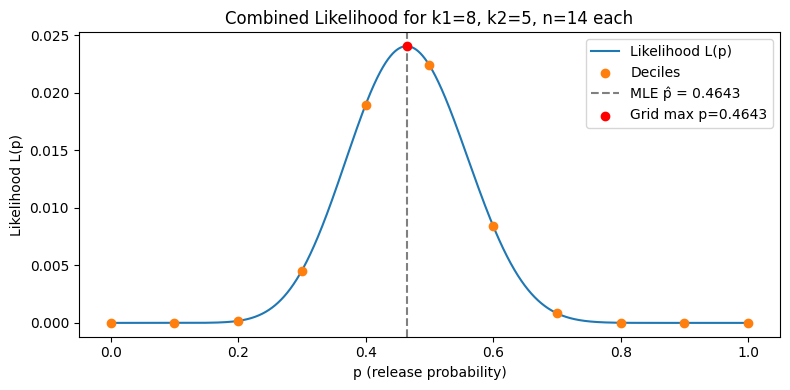


Total trials N = 28, p_hat = 0.464286, SE(p_hat) = 0.094250
 N= 28 -> SE = 0.094250
 N= 56 -> SE = 0.066645
 N=140 -> SE = 0.042150
 N=280 -> SE = 0.029804


In [31]:
# Combined-likelihood analysis for two independent binomial measurements
import numpy as np
import math
import matplotlib.pyplot as plt
from math import comb, log

# Data
n = 14
k1 = 8
k2 = 5

def binom_pmf(n,k,p):
    return comb(n,k) * (p**k) * ((1-p)**(n-k))

# 1) Likelihood and log-likelihood at p = 0.1
p_test = 0.1
L_p_test = binom_pmf(n, k1, p_test) * binom_pmf(n, k2, p_test)
logL_p_test = math.log(L_p_test) if L_p_test>0 else float('-inf')

print("=== Specific p = 0.1 ===")
print(f"L(p=0.1) = {L_p_test:.12e}")
print(f"log L(p=0.1) = {logL_p_test:.12f}\n")

# 2) Likelihood at deciles 0.0, 0.1, ..., 1.0
deciles = np.round(np.arange(0.0, 1.0+0.1, 0.1), 1)
decile_results = []
for p in deciles:
    if p==0.0 or p==1.0:
        L = 0.0
        logL = float('-inf')
    else:
        L = binom_pmf(n, k1, p) * binom_pmf(n, k2, p)
        logL = math.log(L)
    decile_results.append((p, L, logL))

print("=== Likelihood at deciles ===")
for p, L, logL in decile_results:
    print(f"p={p: .1f}  ->  L={L:.12e}   logL={logL if L>0 else '-inf'}")

# Which decile is best?
best_decile = max(decile_results, key=lambda t: t[1])
print(f"\nBest decile: p={best_decile[0]} with L={best_decile[1]:.12e}")

# 3) Analytical MLE (continuous) and refined grid search
p_hat = (k1 + k2) / (2*n)   # total successes / total trials
print(f"\nAnalytical MLE: p_hat = (k1+k2)/(2n) = {p_hat:.8f}")

# refine grid
ps = np.linspace(0.0001, 0.9999, 10001)
Ls = np.array([binom_pmf(n, k1, p) * binom_pmf(n, k2, p) for p in ps])
imax = Ls.argmax()
p_best = ps[imax]
L_best = Ls[imax]
print(f"Refined-grid MLE (10001 pts): p ≈ {p_best:.8f} with L={L_best:.12e}")

# Compare L at analytic p_hat
L_at_phat = binom_pmf(n, k1, p_hat) * binom_pmf(n, k2, p_hat)
print(f"L(p_hat) = {L_at_phat:.12e}    (should match the refined-grid result closely)")

# 4) Plot likelihood curve and mark deciles and MLE
plt.figure(figsize=(8,4))
plt.plot(ps, Ls, label='Likelihood L(p)')
plt.scatter(deciles, [r[1] for r in decile_results], color='C1', zorder=5, label='Deciles')
plt.axvline(p_hat, linestyle='--', color='gray', label=f'MLE p̂ = {p_hat:.4f}')
plt.scatter([p_best], [L_best], color='red', zorder=6, label=f'Grid max p={p_best:.4f}')
plt.xlabel('p (release probability)')
plt.ylabel('Likelihood L(p)')
plt.title('Combined Likelihood for k1=8, k2=5, n=14 each')
plt.legend()
plt.tight_layout()
plt.show()

# 5) How estimate improves with larger sample size: show standard error for p_hat
N_total = 2*n
se = math.sqrt(p_hat*(1-p_hat) / N_total)
print(f"\nTotal trials N = {N_total}, p_hat = {p_hat:.6f}, SE(p_hat) = {se:.6f}")
for N in [N_total, 2*N_total, 5*N_total, 10*N_total]:
    seN = math.sqrt(p_hat*(1-p_hat)/N)
    print(f" N={N:3d} -> SE = {seN:.6f}")


In [32]:
import numpy as np

# Data
counts = np.array([0,0,3,7,10,19,26,16,16,5,5,0,0,0,0])
k_values = np.arange(15)
n = 14
num_experiments = counts.sum()

# Total successes
total_successes = np.sum(k_values * counts)
total_trials = n * num_experiments

# MLE
p_hat = total_successes / total_trials
print(f"Maximum-likelihood estimate (p̂) = {p_hat:.4f}")


Maximum-likelihood estimate (p̂) = 0.4359


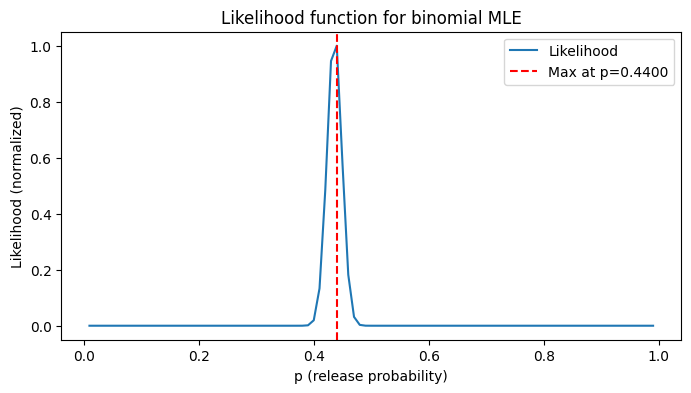

MLE from grid search: p̂ = 0.4400


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Data
counts = np.array([0,0,3,7,10,19,26,16,16,5,5,0,0,0,0])
k_values = np.arange(15)
n = 14
num_experiments = counts.sum()

# Total likelihood function (log-likelihood to avoid underflow)
def log_likelihood(p):
    if p <= 0 or p >= 1:
        return -np.inf  # avoid log(0)
    ll = 0
    for k, c in zip(k_values, counts):
        ll += c * (np.log(comb(n,k)) + k*np.log(p) + (n-k)*np.log(1-p))
    return ll

# Grid of p values
p_grid = np.arange(0.01, 1.0, 0.01)
logL_values = np.array([log_likelihood(p) for p in p_grid])
L_values = np.exp(logL_values - max(logL_values))  # normalize to avoid underflow

# Plot
plt.figure(figsize=(8,4))
plt.plot(p_grid, L_values, label='Likelihood')
plt.xlabel('p (release probability)')
plt.ylabel('Likelihood (normalized)')
plt.title('Likelihood function for binomial MLE')
plt.axvline(p_grid[np.argmax(L_values)], linestyle='--', color='red', label=f"Max at p={p_grid[np.argmax(L_values)]:.4f}")
plt.legend()
plt.show()

# Report MLE from grid
p_hat_grid = p_grid[np.argmax(L_values)]
print(f"MLE from grid search: p̂ = {p_hat_grid:.4f}")


In [35]:
from scipy.optimize import minimize_scalar

# Negative log-likelihood (since we minimize)
def neg_log_likelihood(p):
    return -log_likelihood(p)

result = minimize_scalar(neg_log_likelihood, bounds=(0.001, 0.999), method='bounded')
p_hat_opt = result.x
print(f"MLE from optimization: p̂ = {p_hat_opt:.6f}")

MLE from optimization: p̂ = 0.435914


In [37]:
from math import comb

# Parameters
n = 14
k = 7
p_null = 0.3

# Binomial probability
P_k_given_null = comb(n, k) * (p_null**k) * ((1-p_null)**(n-k))
print(f"P(X=7 | n=14, p=0.3) = {P_k_given_null:.6f}")

P(X=7 | n=14, p=0.3) = 0.061813


In [38]:
import scipy.stats as st

# One-sided p-value (probability of observing k >= 7)
p_value_one_sided = st.binom.sf(k-1, n, p_null)  # sf = 1 - cdf(k-1)
print(f"One-sided p-value (k >= 7) = {p_value_one_sided:.4f}")

# Two-sided p-value (extreme in both tails)
p_value_two_sided = 2 * min(st.binom.cdf(k, n, p_null), st.binom.sf(k-1, n, p_null))
print(f"Two-sided p-value = {p_value_two_sided:.4f}")


One-sided p-value (k >= 7) = 0.0933
Two-sided p-value = 0.1866


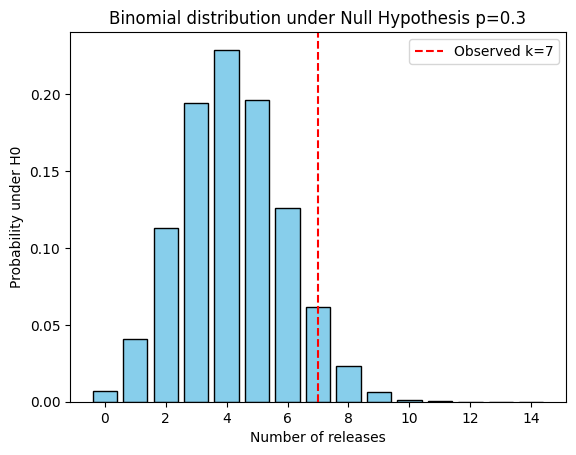

In [39]:
import matplotlib.pyplot as plt

k_values = np.arange(0, n+1)
probs = st.binom.pmf(k_values, n, p_null)

plt.bar(k_values, probs, color='skyblue', edgecolor='black')
plt.axvline(k, color='red', linestyle='--', label=f'Observed k={k}')
plt.xlabel('Number of releases')
plt.ylabel('Probability under H0')
plt.title('Binomial distribution under Null Hypothesis p=0.3')
plt.legend()
plt.show()


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

/var/folders/_7/1g0wns492314pw1m6p9lpk1w0000gp/T/ipykernel_37257/1987854634.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  n_pdf = np.divide(counts, np.trapz(counts, xaxis))


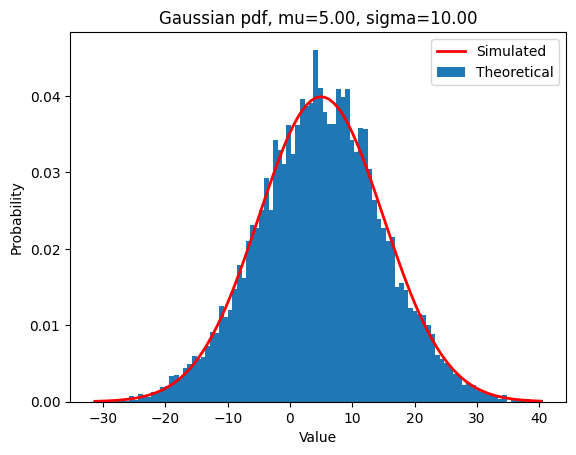

Sample mean = 4.869
Expected value of empirical distribution = 4.871
Expected value of the theoretical distribution = 4.996
Number of different values = 0


/var/folders/_7/1g0wns492314pw1m6p9lpk1w0000gp/T/ipykernel_37257/1987854634.py:49: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plt.bar(xaxis, np.divide(counts, np.trapz(counts, xaxis)))


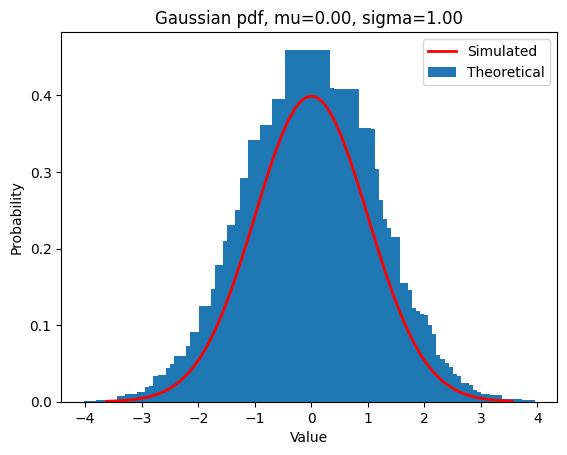

In [28]:
# Let's compare simulated and theoretical Gaussians
mu = 5
sigma = 10
N = 10000

# Get samples
samples = np.random.normal(mu, sigma, N)

# plot histogram for a given number of bins (using trapz to approximate pdf)
nbins = 100
counts, edges = np.histogram(samples, bins=nbins)
xaxis = (edges[1:] + edges[:-1])/2
n_pdf = np.divide(counts, np.trapz(counts, xaxis))
plt.bar(xaxis, n_pdf)

# Show theoretical pdf in red
plt.plot(xaxis, st.norm.pdf(xaxis, mu, sigma), 'r-', linewidth=2)

# labels, ets
plt.title(f'Gaussian pdf, mu={mu:.2f}, sigma={sigma:.2f}')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend(['Simulated', 'Theoretical'])
plt.show()

# Some summary statistics
# 1. The sample mean
print(f'Sample mean = {np.mean(samples):.3f}')

# 2. The expected value of the empirical distribution: the sum of probability x value per bin. This should be similar to the sample mean, but recognize that we lost some information from the binning (i.e., use more bins and this should get closer to the sample mean)
print(f'Expected value of empirical distribution = {np.sum(np.prod([xaxis, np.diff(edges), n_pdf], axis=0)):.3f}')

# 3. The expected value of the theoretical distribution
print(f'Expected value of the theoretical distribution = {np.sum(np.prod([xaxis, np.diff(edges), st.norm.pdf(xaxis, mu, sigma)], axis=0)):.3f}')

# Now standardize ("z-score") the samples by subtracting the mean and dividing by the STD
# The harder way
zSamples = np.divide(samples-np.mean(samples), np.std(samples))

# The easier way
z2Samples = st.zscore(samples)

# Check that they are the same
print(f'Number of different values = {np.count_nonzero(zSamples-z2Samples)}')

# Show the distribution of z-scored values
counts, edges = np.histogram(z2Samples, bins=nbins)
xaxis = (edges[1:] + edges[:-1])/2
plt.bar(xaxis, np.divide(counts, np.trapz(counts, xaxis)))

# Show theoretical "standard normal" pdf in red
plt.plot(xaxis, st.norm.pdf(xaxis), 'r-', linewidth=2)

# labels, ets
plt.title(f'Gaussian pdf, mu={np.mean(zSamples):.2f}, sigma={np.std(zSamples):.2f}')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend(['Simulated', 'Theoretical'])
plt.show()

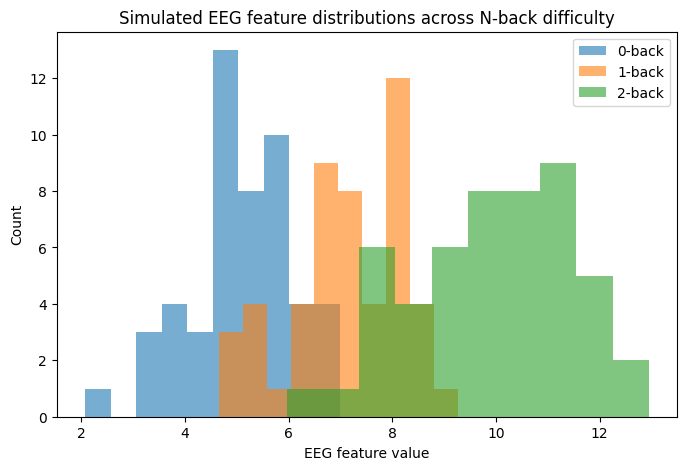

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_trials = 50  # number of trials per task
difficulty_levels = ['0-back', '1-back', '2-back']
means = [5, 7, 10]  # arbitrary EEG feature mean for each difficulty
std_devs = [1.0, 1.2, 1.5]  # roughly increasing variability

# Simulate Gaussian EEG feature data
simulated_data = {}
for i, level in enumerate(difficulty_levels):
    simulated_data[level] = np.random.normal(loc=means[i], scale=std_devs[i], size=n_trials)

# Plot the distributions
plt.figure(figsize=(8,5))
for level in difficulty_levels:
    plt.hist(simulated_data[level], bins=10, alpha=0.6, label=level)
plt.xlabel('EEG feature value')
plt.ylabel('Count')
plt.title('Simulated EEG feature distributions across N-back difficulty')
plt.legend()
plt.show()


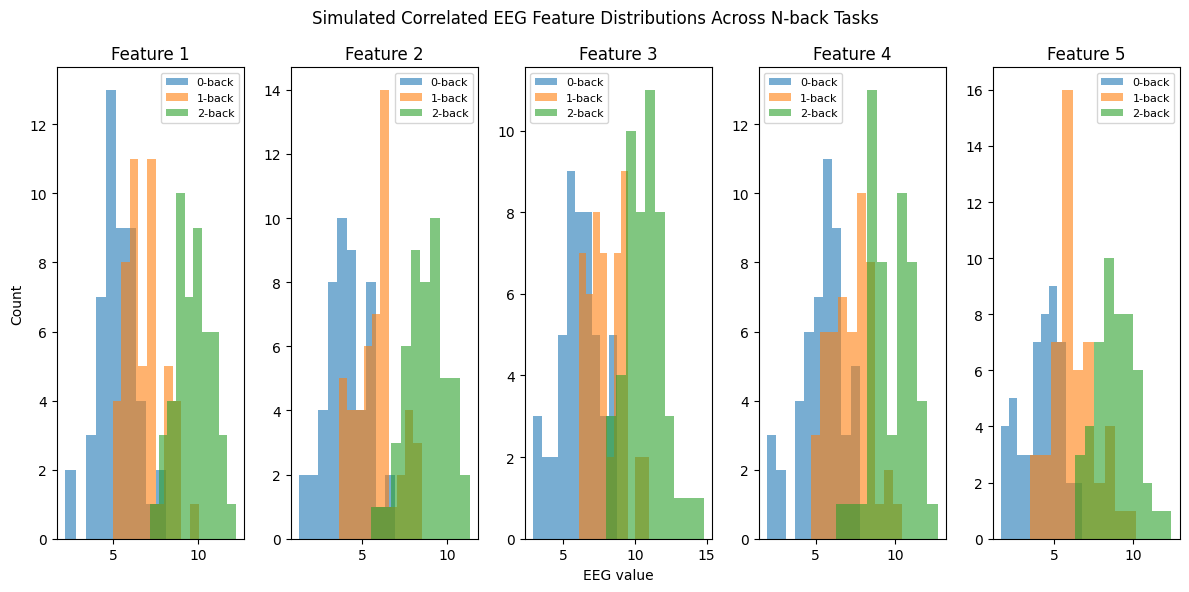

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_trials = 50  # trials per difficulty
difficulty_levels = ['0-back', '1-back', '2-back']
n_features = 5  # number of EEG features

# Means for each feature per difficulty (arbitrary, increasing with task difficulty)
# Shape: (difficulty, feature)
means = np.array([
    [5, 4, 6, 5, 4],   # 0-back
    [7, 6, 8, 7, 6],   # 1-back
    [10, 9, 11, 10, 9] # 2-back
])

# Covariance matrix to introduce correlations between features
# Start with some baseline correlations
base_cov = np.array([
    [1.0, 0.5, 0.3, 0.2, 0.1],
    [0.5, 1.0, 0.4, 0.3, 0.2],
    [0.3, 0.4, 1.0, 0.5, 0.3],
    [0.2, 0.3, 0.5, 1.0, 0.4],
    [0.1, 0.2, 0.3, 0.4, 1.0]
])

# Ensure positive-definite covariance
cov_matrix = base_cov @ base_cov.T

# Simulate data
simulated_data = {}

for i, level in enumerate(difficulty_levels):
    # Use multivariate normal
    simulated_data[level] = np.random.multivariate_normal(
        mean=means[i],
        cov=cov_matrix,
        size=n_trials
    )

# Plot distributions for each feature
plt.figure(figsize=(12,6))
for f in range(n_features):
    plt.subplot(1, n_features, f+1)
    for level in difficulty_levels:
        plt.hist(simulated_data[level][:, f], bins=10, alpha=0.6, label=level)
    plt.title(f'Feature {f+1}')
    if f == 0:
        plt.ylabel('Count')
    if f == 2:
        plt.xlabel('EEG value')
    plt.legend(fontsize=8)
plt.suptitle('Simulated Correlated EEG Feature Distributions Across N-back Tasks')
plt.tight_layout()
plt.show()
